## 1. Loading the dataset

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/a-fake-news-dataset-around-the-syrian-war/FA-KES-Dataset.csv


In [2]:
df=pd.read_csv(r"../input/a-fake-news-dataset-around-the-syrian-war/FA-KES-Dataset.csv",encoding = 'unicode_escape')
df.head(5)

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [3]:
df.shape

(804, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [5]:
df.columns

Index(['unit_id', 'article_title', 'article_content', 'source', 'date',
       'location', 'labels'],
      dtype='object')

## 2. Data Pre-processing

- Data Formatting
Changing the data type of the column data from object to datetime

In [6]:
pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df.head(4)

,unit_id,article_title,article_content,source,date,location,labels,year
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0,2017
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0,2017
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0,2017
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0,2017


In [7]:
df['article_title_length']=df['article_title'].apply(len)
df['article_title_length']

0      57
1      76
2      47
3      43
4      52
       ..
799    47
800    47
801    49
802    55
803    50
Name: article_title_length, Length: 804, dtype: int64

## 2. Exploratory Data Analysis

Finding the insights of the given dataset.

Lets check out in which year the most fake news were released.

In [8]:
print('The dataset is from year',df.year.min(),'to',df.year.max())

The dataset is from year 2011 to 2018


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

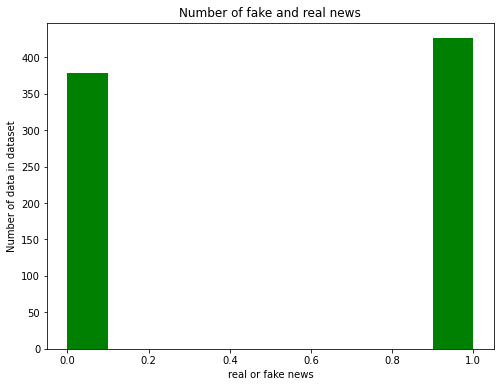

In [10]:
plt.figure(figsize=(8,6))
plt.hist(df.labels,color = 'green');
plt.ylabel('Number of data in dataset');
plt.xlabel("real or fake news")
plt.title("Number of fake and real news");

As per the above output, the dataset contains 426 real news where as 378 fake news data

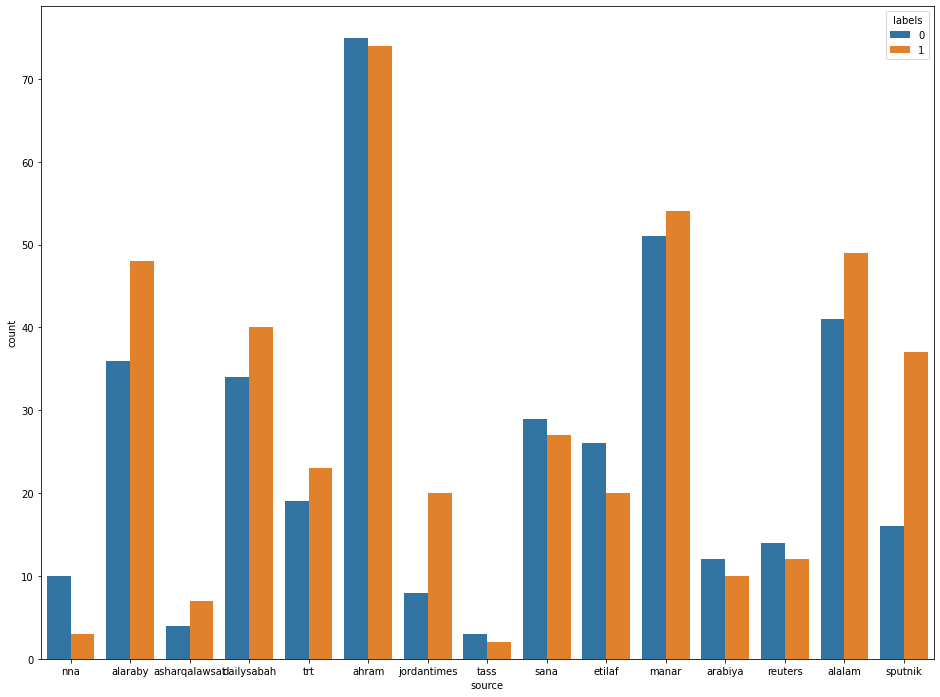

In [11]:
plt.figure(figsize=(16,12))
sns.countplot(x=df.source,hue=df.labels);

The highest source of news is 'ahram', it is the source of maximum real as well as fake news.
#### The sources named as 'nna', 'ahram',, tass source', 'sana','etllaf', 'arabia'and 'reuters' has given more number of fake news than the real news.

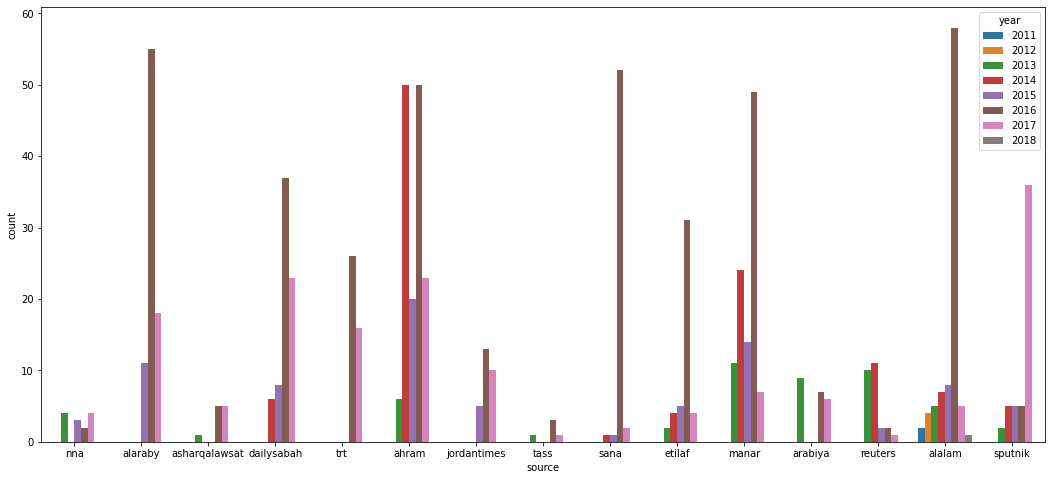

In [12]:
plt.figure(figsize=(18,8))
sns.countplot(x=df.source,hue=df.year,data =df);

The above graph shows the year wise number of news released by the various sources.
One thing that can also be infered out of the graph is that the maximum number of news were released in 2016, by the various sources

In [13]:
real_df=df.loc[df.labels==1]

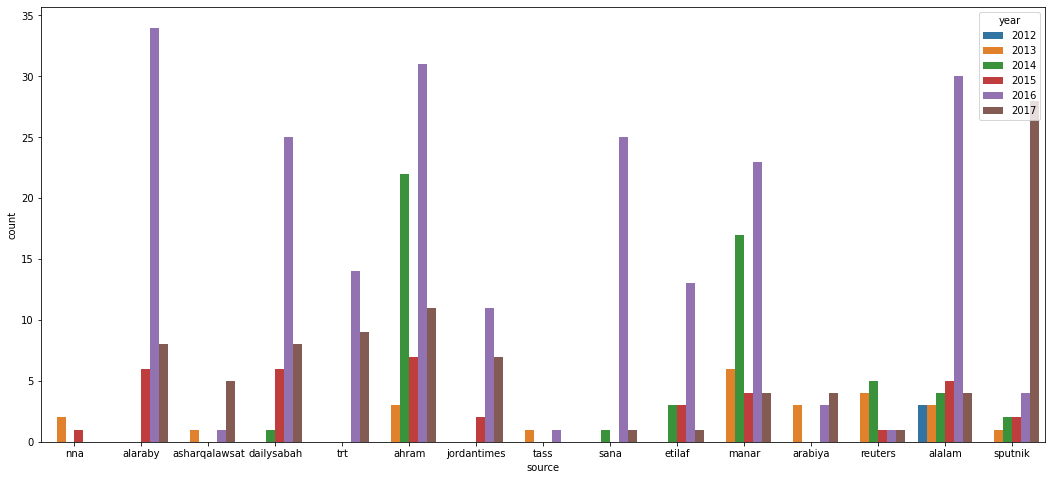

In [14]:
plt.figure(figsize=(18,8))
sns.countplot(x='source',hue='year',data =real_df);

The highest number of real news were released by the alarby source in 2016, and also by othe sources as well the highest number of real news were published in 2016.(sputnik being the exception, its highest was in 2017).

In [15]:
fake_df=df.loc[df.labels==0]

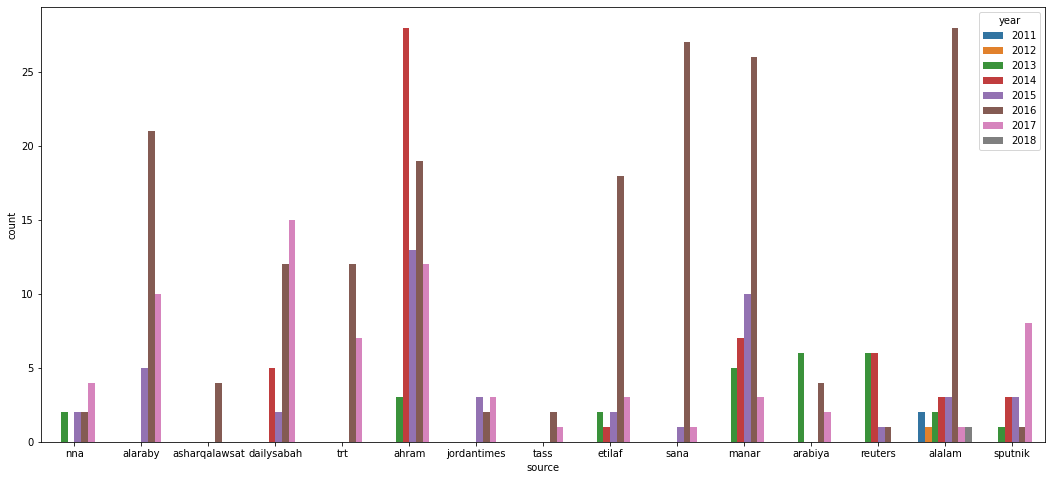

In [16]:
plt.figure(figsize=(18,8))
sns.countplot(x='source',hue='year',data =fake_df);

Not that similar with the real news trend, but still in 2016, the number of fake news released were greater than any other sources.
It should be noticed that few sources like 'asharqalawsat'was a source to fake news in just 2016,'tass source','trt' for 2 years,and 'jordantimes','sana','alaraby' for 3 years only

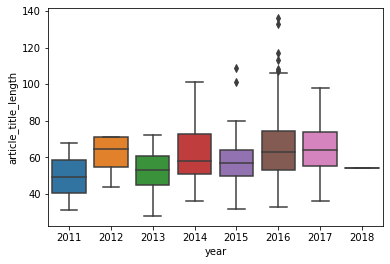

In [17]:
sns.boxplot(y='article_title_length',x='year',data=df);

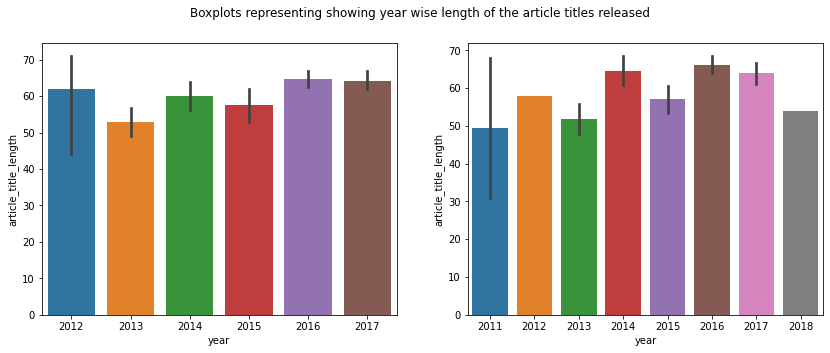

In [18]:
figure, axis = plt.subplots(1,2,figsize=(14,5))
figure.suptitle("Boxplots representing showing year wise length of the article titles released")
sns.barplot(ax=axis[0],y='article_title_length',x='year',data=real_df);
sns.barplot(ax=axis[1],y='article_title_length',x='year',data=fake_df);
plt.show()

The length of the news is somewhat around 60 for all years, whether the news in fake or not, there are some outliers associated with all the years, but the range goes around 60 in all cases.